<a href="https://colab.research.google.com/github/thuc-github/MIS710-T12023/blob/main/Week%203/MIS710_Lab3-Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MIS710 Lab 3 Week 3**
Author: Associate Professor Lemai Nguyen

Objective: to learn and practise linear regression models with scikit-learn

Dataset: HousingPrice

Source: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset 
The dataset was modified to allow you deal with missing data. 
**Download the modified data at the unit site.**

**To do before the class:**
1. complete Labs 0, 1 and 2
2. learn Lecture 3: Supervised Machine Learning: Linear Regression
3. download the housing.csv dataset and store it in your Google drive, MIS710 folder

**Student name:**

Student ID: 

## **Loading Libraries**


In [ ]:
#load libraries
import pandas as pd #for data manipulation and analysis
import numpy as np #for working with arrays

#import data visualisation libraries 
import matplotlib.pyplot as plt
import seaborn as sns



## **Mount your Google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **Loading Data** 


1.   Load the dataset
2.   Explore the data



In [ ]:
# load dataset
records = pd.read_csv("/content/drive/MyDrive/MIS710/Housing31.csv")

#explore the dataset
print(records)

print('Sample size:', records.shape[0])
print('Number of columns:', records.shape[1]) 

In [ ]:
print(records.info())
print(records.shape)

In [ ]:
#area is wrongly documented as string
records['area'] = pd.to_numeric(records['area'], errors='coerce')

## **Are there missing data?** 

The data preprocessing is cyclic with analysing and visualising data, handling missing data, and feature engineering. For the learning purpose, we show you some simple techniques, you should move between the activities yourself. 

In [ ]:
#learn to use for loop, and accessing elements of a dataframe using iloc
#Count missing data
for i in records.iloc[:,0:]: 
  miss=records[i].isna().sum()
  print(i,'missing: ', miss)


In [ ]:
#another way to find missing data is using the function isnull()
#read about isnull() here https://pandas.pydata.org/docs/reference/api/pandas.isnull.html 
#read further at https://www.sharpsightlabs.com/blog/pandas-isnull/ 
print(records.isnull().sum())

## **Variable analysis**

Stats and visualtion
1.  Univariate analysis
2.  Bivariate analysis
3.  Multivariate analysis




**Univariate analysis explores and visualises each variable at a time**


In [ ]:
#overview 
records.describe()


In [ ]:
#set the formatting for floating numbers 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

data_types =['object', 'float', 'int'] 
records.describe(include=data_types)

## **You can use stats results to decide on and handle missing data**

In [ ]:
#describe categorical variables
records['area'].describe()

In [ ]:
#describe categorical variables
records['furnishingstatus'].describe()

In [ ]:
records['mainroad'].describe()

In [ ]:
records['mainroad'].mode()[0]

In [ ]:
#Fill in missing numerical data with mean and categorical data with mode
records['area'].fillna(records['area'].mean(),inplace=True)
records['furnishingstatus'].fillna(records['furnishingstatus'].mode()[0], inplace=True) #there can be more than one mode

#do it yourself for mainroad

**Visualise each numerical variable**

In [ ]:
#using seaborn https://seaborn.pydata.org/generated/seaborn.histplot.html


In [ ]:
#create a boxplot


**It's your turn: explore other numerical variables**

In [ ]:
#visualise other numerical variables one at a time


**Explore each categorical variable**

In [ ]:
#explore each categorial variable
print(records['furnishingstatus'].value_counts())
print('Furnishing Status mode: ', records['furnishingstatus'].mode())

In [ ]:
#Another way to do it
records.furnishingstatus.value_counts()

Do it yourself for other categorical variables

**Visualise each categorical variable**

In [ ]:
#Using seaborn
sns.countplot(x=records['bathrooms'])

**Visualise other categorical variables**

In [ ]:
cat_variables = ['bedrooms', 'bathrooms','stories', 'parking','mainroad','guestroom','basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for i in cat_variables:
   plt.figure()
   sns.countplot(x=records[i])


## **Multivariate visualisation**

**Display a countplot for one categorical variable grouped by a second categorical variable**
https://seaborn.pydata.org/generated/seaborn.countplot.html 

In [ ]:
sns.countplot(data=records, x='prefarea', hue='mainroad')

In [ ]:
#Do it yourself 


**Compare distributions of numerical variables using boxplots**
https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [ ]:
sns.boxplot(data=records, x='price', y='basement')

In [ ]:
#Do it yourself, hint: using x=  y= and hue=

**Ploting diagram to see relationships between two numerical variables**
https://seaborn.pydata.org/generated/seaborn.scatterplot.html 

In [ ]:
sns.scatterplot(data=records, x='area', y='price')

In [ ]:
#Let't move price to the first column
first_column=records.pop('price')
records.insert(0,'price',first_column)

In [ ]:
records.iloc[9:14]

In [ ]:
#generate heatmaps to explore relationships
sns.heatmap(records.corr(), square=True, cmap='Blues', annot=True)
plt.show()

In [ ]:
#generate dendrograms to show hierarchical clustering  
sns.clustermap(records.corr(), square=True, cmap='Blues', annot=True, row_cluster=False)
plt.show()

## **Encoding data**

In [ ]:
#Last week, we learned to convert categorical variables to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
records['mainroad_N'] = encoder.fit_transform(records['mainroad'])
records['basement_N'] = encoder.fit_transform(records['basement'])


In [ ]:
#there are other ways of doing this, for example
records['hotwaterheating_N'] = records['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)

records.sample(10)

In [ ]:
#Another way is getting all catagorical columns
cat_variables = records.select_dtypes(include=['object']).columns
#Convert categorical columns to numeric
records[cat_variables] = records[cat_variables].apply(encoder.fit_transform)

# Display the updated dataset
print(records)

In [ ]:
#OPTIONAL
#another day, defining your OWN function
#convert categorical data to numerical 
def coding_furnishingstatus(x):
        if x=='furnished': return 3
        if x=='semi-furnished': return 2
        if x=='unfurnished': return 1
       
records['furnishingstatus_N'] = records['furnishingstatus'].apply(coding_furnishingstatus)

records.iloc[9:14]

In [ ]:
#write code to drop redudant columns
records= records.drop(['mainroad_N','basement_N','hotwaterheating_N','furnishingstatus_N'], axis=1)
print(records.info())

## **Feature Selection**

In [ ]:
#feature selection
features=['area']
X=records[features]
X.head()

In [ ]:
#specify the label
y=records['price']
y.head()

## **Split the Dataset**

Split arrays or matrices into random train and test subsets
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split function

# Split dataset into training set 70% and test set 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  # 70% training and 30% testing 

#inspect the split datasets
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape)
print('Test dataset size:',y_train.shape)


## **Training a Linear Regression Model**

1.   Train a model using the training dataset
2.   Make prediction using the model for the test dataset

Read about Linear Regression https://scikit-learn.org/stable/modules/linear_model.html

LinearRegression will take in its fit method arrays X, y and will store the coefficients of the linear model in its coef_ member






In [ ]:
#import linear_model 
from sklearn import linear_model

#create a linear_model object
reg = linear_model.LinearRegression()

**Train a model**

In [ ]:
# Train a Regression model (regressor) with the training dataset 
reg=reg.fit(X_train, y_train)

**Make predictions using the model and the test set**

In [ ]:
#Make predictions for the test dataset
y_pred = reg.predict(X_test)


**Inspect the predictions and the original labels**

In [ ]:
plt.scatter(y_test, y_pred) 
plt.xlabel("Actual prices") 
plt.ylabel("Predicted prices") 
plt.title("Actual prices vs Predicted prices")
plt.show()

In [ ]:
#set the formatting for floating numbers 
pd.set_option('display.float_format', lambda x: '%.0f' % x)
area=X_test['area']
#inspection
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
inspection=pd.DataFrame({'Area':area, 'Actual':y_test, 'Predicted':y_pred})
inspection.head(20)

**Getting the Intercept and Coefficients**

In [ ]:
print('%.2f' % reg.intercept_) 
print('%.2f' % reg.coef_)
print('Price = ', '%.2f' % reg.intercept_, ' + ', '%.2f' % reg.coef_, ' * ', 'Area' )


In [ ]:
sns.scatterplot(data=inspection, x='Area', y='Actual')
sns.regplot(data=inspection, x='Area', y='Predicted', color='blue')

## **Performance Metrics**

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate and print the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.0f}")

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate and print the root mean square error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error: {rmse:.0f}")

In [ ]:
#Examine the performance using the descriptive stats of proice 
records['price'].describe()

## **Repeat from the feature selection steps to create multiple linear regression model**

In [ ]:
#run the following code and examine the correlations among the variables
records.corr()

In [ ]:
#select relevant features and train and evaluate a model

# Try it yourself! 

**Do it yourself:** Repeat the above steps with the insurance dataset to consilidate your learning

## Loading libraries

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

## Import dataset

In [2]:
# Load data using pandas.read_csv(filepath_or_url, sep=',')
url = 'https://raw.githubusercontent.com/thuc-github/MIS710-T12023/main/Week%203/insurance.csv'

df = pd.read_csv(url)


## EDA

* How many rows and columns in the dataset? 
* Return the first n rows.
* What are the columns and their datatypes?
* Is there any missing values? 
* How to deal with categorical features? 
* Any strong correlation from the dataset?  
* What are the stats for the `charges`? Plot overall distribution of `charges`; and ditribution of chareges for smoker and non-smokers. Practice more with `bmi`, `age` and `sex` variables. 



In [3]:
# How many rows and columns in the dataset?
df

# Return the first n rows.
df.head()

# What are the columns and their datatypes?
df.info()

# Is there any missing values?
df.isnull().sum()

# Any strong correlation from the dataset?
df.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<ipython-input-4-cc4cd72a8cfc>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),


<Axes: >

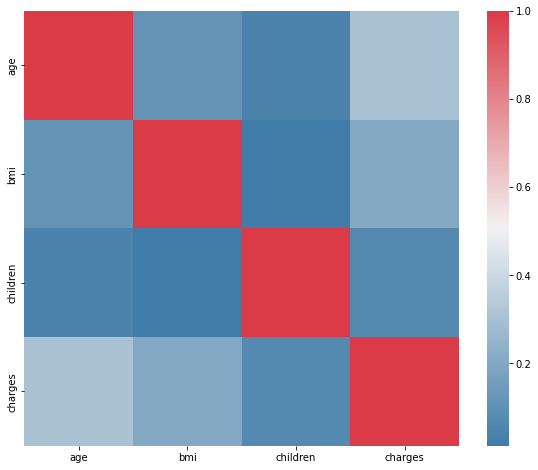

In [4]:
# Correlation plot
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [5]:
# How to deal with categorical features?

from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)


In [6]:
''' 
What are the stats for the charges? Plot overall distribution of charges; 
and ditribution of chareges for smoker and non-smokers. 
'''
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<Axes: >

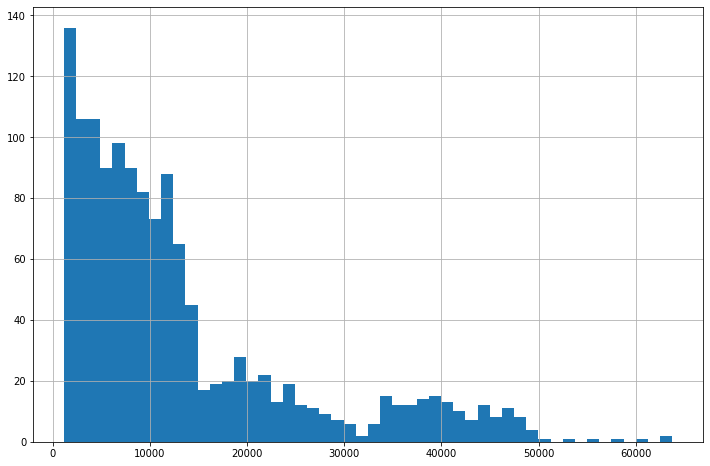

In [7]:
df.charges.hist(bins=50, figsize=(12,8))

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

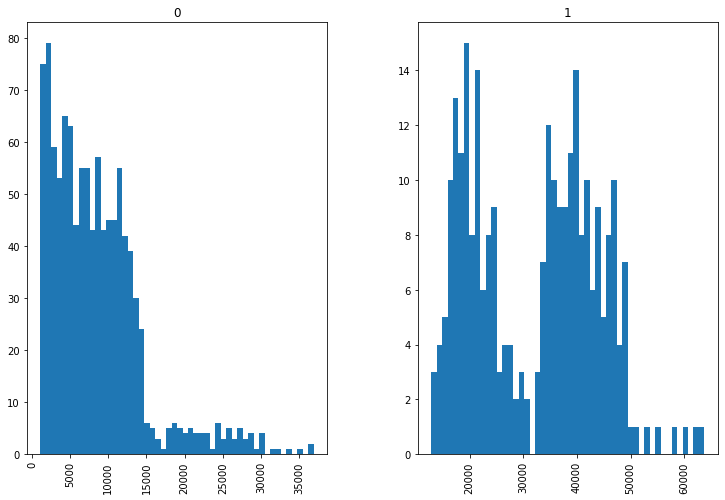

In [8]:
df.charges.hist(by=df.smoker, bins=50, figsize=(12,8))

<ipython-input-9-c051c0ca3e97>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
<ipython-input-9-c051c0ca3e97>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)


Text(0.5, 1.0, 'Distribution of charges for non-smokers')

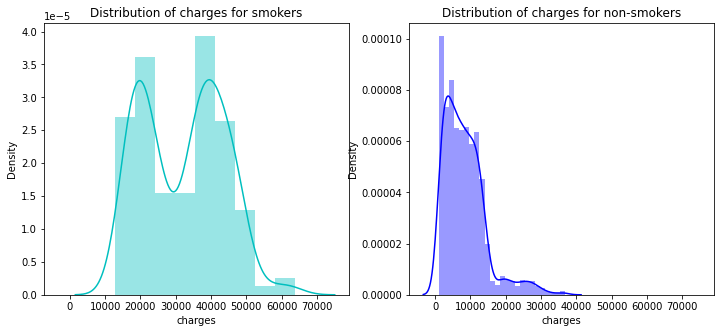

In [9]:
# Alternative using seaborn

f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122, sharex = ax)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

## Data preparation 


1.   Prepare X, y
2.   Prepare X_train, X_test, y_train, y_test (hint: using `train_test_split')



In [10]:
X = df.drop(['charges'], axis = 1)
y = df.charges

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

## Model implementation

1. Try with the original data. What's the performance?
2. Let's add data normalisation. Has the performance been improved?

In [11]:
lr = LinearRegression().fit(X_train,y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('MSE_Train: {}, MSE_Test: {}, MAE_Train: {}, MAE_Test: {}'.format(mean_squared_error(y_train, y_train_pred),
                                                      mean_squared_error(y_test, y_test_pred),
                                                      mean_absolute_error(y_train, y_train_pred),
                                                      mean_absolute_error(y_test, y_test_pred)))

print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,y_train_pred),
r2_score(y_test,y_test_pred)))

MSE_Train: 37729580.5098492, MSE_Test: 31845929.13415943, MAE_Train: 4235.3838760320905, MAE_Test: 3930.3332739011403
R2 train data: 0.737, R2 test data: 0.800


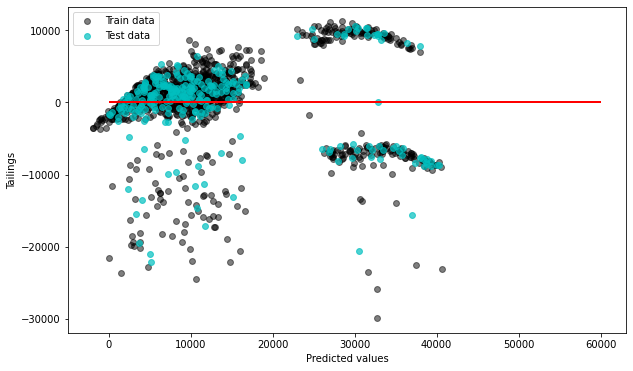

In [12]:
plt.figure(figsize=(10,6))

plt.scatter(y_train_pred, y_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred, y_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

In [13]:
quad = PolynomialFeatures(degree = 2)
X_quad = quad.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_quad, y, test_size=0.2, random_state = 0)

plr = LinearRegression().fit(X_train, y_train)

y_train_pred = plr.predict(X_train)
y_test_pred = plr.predict(X_test)

print('MSE_Train: {}, MSE_Test: {}, MAE_Train: {}, MAE_Test: {}'.format(mean_squared_error(y_train, y_train_pred),
                                                      mean_squared_error(y_test, y_test_pred),
                                                      mean_absolute_error(y_train, y_train_pred),
                                                      mean_absolute_error(y_test, y_test_pred)))

print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,y_train_pred),
r2_score(y_test,y_test_pred)))

MSE_Train: 26437340.35473178, MSE_Test: 21504212.79669052, MAE_Train: 3299.448925401869, MAE_Test: 3089.882598615672
R2 train data: 0.816, R2 test data: 0.865


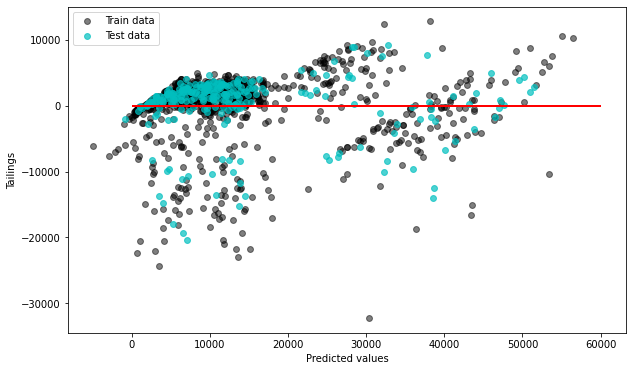

In [14]:
plt.figure(figsize=(10,6))

plt.scatter(y_train_pred, y_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred, y_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()